# Lab 5, 31.03

Can we replace Excel workflow by Python code? Probably!

We will first learn harder way of working with text data, and then introduce Pandas for speeding things up. This can be very useful for course project.

<img src="https://imgs.xkcd.com/comics/data.png">

## List and dict comprehension

Trick (but also speeds up code a lot) for fast constructing lists

In [9]:
[x**2 for x in range(1, 10)] # List comprehension

[1, 4, 9, 16, 25, 36, 49, 64, 81]


In [10]:
{x: x**2 for x in range(1, 10)} # Dict comprehension

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

In [ ]:
assert primes(5) == [2, 3, 5]

## I/O

Content is based on http://opentechschool.github.io/python-data-intro

In [2]:
f = open("data/4/months.txt")
print(f.read()) # Single blob of text

January
February
March
April
May
June
July
August
September
October
November
December


In [7]:
lines = open("data/4/months.txt").read().splitlines() # Splitted conveniently by line

In [12]:
lines

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [13]:
f = open("data/4/months_lower_case.txt", "w")
f.write("\n".join([x.lower() for x in lines])) # "\n".join(list) is a "trick" function to quickly join lines with \n

# CSV files

Most of data in human readable format will be CSV. Worth learning!

In [26]:
# Print first 2 lines of raw file
from itertools import islice
for line in islice(open("data/4/coffee.csv"), 2): # Take 2 first elements
    print line.strip() # Remove \n

"Coffee","Water","Milk","Icecream"
"Espresso","No","No","No"


In [27]:
# Reading CSV file
import csv
f=open("data/4/coffee.csv")
for row in csv.reader(f):
    print(row)

['Coffee', 'Water', 'Milk', 'Icecream']
['Espresso', 'No', 'No', 'No']
['Long Black', 'Yes', 'No', 'No']
['Flat White', 'No', 'Yes', 'No']
['Cappuccino', 'No', 'Yes - Frothy', 'No']
['Affogato', 'No', 'No', 'Yes']


## Ex. 3 (Airports), 1 point

Visit the [OpenFlights data page](http://openflights.org/data.html) and download their airports data file - "airports.dat". This is a file in CSV format, open it in a text editor if you want to have a look at it.

Sample entry (line): ```507,"Heathrow","London","United Kingdom","LHR","EGLL",51.4775,-0.461389,83,0,"E","Europe/London"```

Print all airpots of given country

In [43]:
## Snippet to read first column (airport name) of airports.dat
import csv
f = open("data/4/airports.dat")
for row in csv.reader(f):
    print(row[1])
    break

Goroka


## Ex.4 (Histogram of route distances), 2 points

Visit the [OpenFlights data page](http://openflights.org/data.html) and download their routes data file - "routes.dat". 

Sample entry (line): ```TOM,5013,ACE,1055,BFS,465,,0,320```

This a multiple stage problem:

* Read the airports file (airports.dat) and build a dictionary mapping the unique airport ID to the geographical coordinates (latitude & longitude.) This allows you to look up the location of each airport by its ID.

* Read the routes file (routes.dat) and get the IDs of the source and destination airports. Look up the latitude and longitude based on the ID. Using those coordinates, calculate the length of the route and append it to a list of all route lengths.

* Plot a histogram based on the route lengths, to show the distribution of different flight distances.

In [38]:
from math import cos,radians,sin,pow,asin,sqrt

def geo_distance(lat1, long1, lat2, long2):
    radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius

    # Lat,long are in degrees but we need radians
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    long1 = radians(long1)
    long2 = radians(long2)

    dlat = lat2-lat1
    dlon = long2-long1

    a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
    distance = 2 * radius * asin(sqrt(a))

    return distance

geo_distance(-37.814,144.963,52.519,13.406) # Melbourne to Berlin in km!

15973.237754707652

## Pandas

Content more or less copied from last year course https://github.com/gmum/python-lecture/blob/master/Pandas-1.ipynb

**pandas** is an open source, BSD-licensed library providing 

+ high-performance, easy-to-use data structures and 

+ data analysis tools for the Python programming language.

## Intro to data structures

### Series

+ [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). 


+ The axis labels are collectively referred to as the index. 


+ The basic method to create a Series is to call:

In [ ]:
s = Series(data, index=index)

Here, `data` can be many different things:

+ a Python `dict`
+ an `ndarray`
+ a scalar value (like 5)

The passed `index` is a list of axis labels.

In [9]:
import numpy as np
from pandas import Series, DataFrame

s = Series(np.random.randn(5), index=['a', 'b', 'c', 'i', 'e'])
s

a    0.633218
b    0.161945
c    0.144935
i    1.935944
e    0.257336
dtype: float64

#### Series is `dict`-like

In [3]:
s['a']

-0.55957557955183213

In [4]:
s + s # Works!

a   -1.119151
b    1.384954
c    1.341911
i    0.674767
e   -1.668974
dtype: float64

In [6]:
s[1:] + s # Wow! Take home message: series is like adding np.arrays but with index book-keeping

a         NaN
b    1.384954
c    1.341911
e   -1.668974
i    0.674767
dtype: float64

## Dataframe

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

+ `Dict` of 1D `ndarrays`, `lists`, `dicts`, or Series
+ 2-D `numpy.ndarray`
+ Structured or record `ndarray`
+ A Series
+ Another DataFrame

Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. 

If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame.

Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

In [11]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [12]:
d = {'one' : Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df = DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [66]:
data2 = [{"a": 5}, {'a': 1, 'b': 2}, 
         {'a': 5, 'b': 10, 'c': 20}]
x = DataFrame(data2)
x

,a,b,c
0,5,NaN,NaN
1,1,2.0,NaN
2,5,10.0,20.0


## There are some cool functions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1162e5dd0>]], dtype=object)

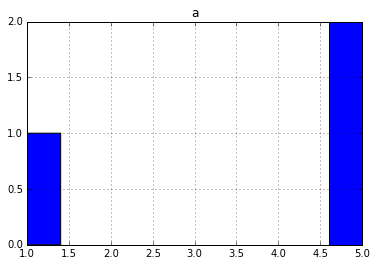

In [67]:
x.hist("a")

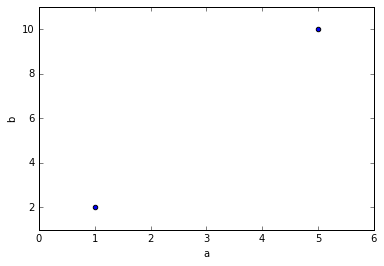

In [52]:
x.plot(kind="scatter", x="a", y="b")

# Example: Movie analysis

/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1185c7490>]], dtype=object)

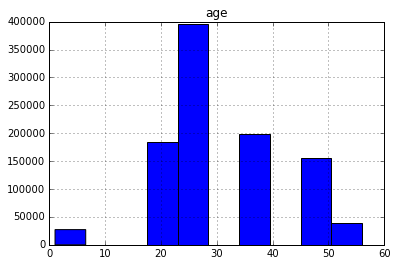

In [77]:
# Don't run, example how to process data in "real world"
import os
def get_movie_data():
    unames = ['user_id','gender','age','occupation','zip']
    users = pd.read_table(os.path.join('data','5','users.dat'), 
                          sep='::', header=None, names=unames)
    
    rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
    ratings = pd.read_table(os.path.join('data','5','ratings.dat'), 
                            sep='::', header=None, names=rnames)
    
    mnames = ['movie_id', 'title','genres']
    movies = pd.read_table(os.path.join('data','5','movies.dat'), 
                           sep='::', header=None, names=mnames)

    data = pd.merge(pd.merge(ratings, users), movies)
    
    return data
movie_data = get_movie_data()
movie_data.to_csv("data/5/movies.csv")
movie_data.hist("age")

In [79]:
movie_data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


## Example. 1 - what is the highest rated movie?

In [81]:
tmp = movie_data[['title','rating']]
print tmp.head()

                                    title  rating
0  One Flew Over the Cuckoo's Nest (1975)       5
1  One Flew Over the Cuckoo's Nest (1975)       5
2  One Flew Over the Cuckoo's Nest (1975)       4
3  One Flew Over the Cuckoo's Nest (1975)       4
4  One Flew Over the Cuckoo's Nest (1975)       5


In [82]:
mean_rating = tmp.groupby('title').mean()
print mean_rating.describe()

            rating
count  3706.000000
mean      3.238892
std       0.672925
min       1.000000
25%       2.822705
50%       3.331546
75%       3.740741
max       5.000000


In [83]:
print mean_rating.sort('rating', ascending=False).head(10)

                                           rating
title                                            
Ulysses (Ulisse) (1954)                       5.0
Lured (1947)                                  5.0
Follow the Bitch (1998)                       5.0
Bittersweet Motel (2000)                      5.0
Song of Freedom (1936)                        5.0
One Little Indian (1973)                      5.0
Smashing Time (1967)                          5.0
Schlafes Bruder (Brother of Sleep) (1995)     5.0
Gate of Heavenly Peace, The (1995)            5.0
Baby, The (1973)                              5.0


/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [84]:
mean_rating = tmp.groupby('title')['rating'].agg(['mean','count']) #using the syntactic sugar
print mean_rating.sort(['mean','count'], ascending=[False, False]).head(10)

                                           mean  count
title                                                 
Gate of Heavenly Peace, The (1995)          5.0      3
Smashing Time (1967)                        5.0      2
Baby, The (1973)                            5.0      1
Bittersweet Motel (2000)                    5.0      1
Follow the Bitch (1998)                     5.0      1
Lured (1947)                                5.0      1
One Little Indian (1973)                    5.0      1
Schlafes Bruder (Brother of Sleep) (1995)   5.0      1
Song of Freedom (1936)                      5.0      1
Ulysses (Ulisse) (1954)                     5.0      1


/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [85]:
mask = mean_rating['count'] > 1000
print mean_rating[mask].head()

                                  mean  count
title                                        
2001: A Space Odyssey (1968)  4.068765   1716
Abyss, The (1989)             3.683965   1715
African Queen, The (1951)     4.251656   1057
Air Force One (1997)          3.588290   1076
Airplane! (1980)              3.971115   1731


In [86]:
print mean_rating[mask].sort('mean', ascending=False).head(5)

                                      mean  count
title                                            
Shawshank Redemption, The (1994)  4.554558   2227
Godfather, The (1972)             4.524966   2223
Usual Suspects, The (1995)        4.517106   1783
Schindler's List (1993)           4.510417   2304
Raiders of the Lost Ark (1981)    4.477725   2514


/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


## Example 2. Worst movie for date?

In [93]:
mean_ratings = pd.pivot_table(movie_data, 'rating', index='title', 
                              columns='gender', aggfunc='mean')
print mean_ratings.head(10)

gender                                    F         M
title                                                
$1,000,000 Duck (1971)             3.375000  2.761905
'Night Mother (1986)               3.388889  3.352941
'Til There Was You (1997)          2.675676  2.733333
'burbs, The (1989)                 2.793478  2.962085
...And Justice for All (1979)      3.828571  3.689024
1-900 (1994)                       2.000000  3.000000
10 Things I Hate About You (1999)  3.646552  3.311966
101 Dalmatians (1961)              3.791444  3.500000
101 Dalmatians (1996)              3.240000  2.911215
12 Angry Men (1957)                4.184397  4.328421


In [94]:

top_mean_ratings = mean_ratings.ix[mask]
print top_mean_ratings.head()

gender                               F         M
title                                           
2001: A Space Odyssey (1968)  3.825581  4.129738
Abyss, The (1989)             3.659236  3.689507
African Queen, The (1951)     4.324232  4.223822
Air Force One (1997)          3.699588  3.555822
Airplane! (1980)              3.656566  4.064419


In [95]:
top_female = top_mean_ratings.sort('F', ascending=False)
print top_female.head()

gender                                   F         M
title                                               
Schindler's List (1993)           4.562602  4.491415
Shawshank Redemption, The (1994)  4.539075  4.560625
Usual Suspects, The (1995)        4.513317  4.518248
Rear Window (1954)                4.484536  4.472991
Sixth Sense, The (1999)           4.477410  4.379944


/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [96]:

top_male = top_mean_ratings.sort('M', ascending=False)
print top_male.head(5)

gender                                            F         M
title                                                        
Godfather, The (1972)                      4.314700  4.583333
Shawshank Redemption, The (1994)           4.539075  4.560625
Raiders of the Lost Ark (1981)             4.332168  4.520597
Usual Suspects, The (1995)                 4.513317  4.518248
Star Wars: Episode IV - A New Hope (1977)  4.302937  4.495307


/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [97]:

top_mean_ratings['diff'] = abs(top_mean_ratings['F'] - top_mean_ratings['M'])
print top_mean_ratings.sort('diff', ascending=True).head(10)

gender                                              F         M      diff
title                                                                    
Jerry Maguire (1996)                         3.758315  3.759424  0.001109
Indiana Jones and the Temple of Doom (1984)  3.674312  3.676568  0.002256
Good Will Hunting (1997)                     4.174672  4.177064  0.002392
Fugitive, The (1993)                         4.100457  4.104046  0.003590
Batman Returns (1992)                        2.980100  2.975904  0.004196
Usual Suspects, The (1995)                   4.513317  4.518248  0.004931
Green Mile, The (1999)                       4.159722  4.153105  0.006617
Boogie Nights (1997)                         3.763838  3.771295  0.007458
Chicken Run (2000)                           3.885559  3.877339  0.008220
Blair Witch Project, The (1999)              3.038732  3.029381  0.009351


/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [98]:
print top_mean_ratings.sort('diff', ascending=False).head(10)

gender                                              F         M      diff
title                                                                    
Animal House (1978)                          3.628906  4.167192  0.538286
Rocky Horror Picture Show, The (1975)        3.673016  3.160131  0.512885
Mary Poppins (1964)                          4.197740  3.730594  0.467147
Reservoir Dogs (1992)                        3.769231  4.213873  0.444642
Gone with the Wind (1939)                    4.269841  3.829371  0.440471
South Park: Bigger, Longer and Uncut (1999)  3.422481  3.846686  0.424206
Airplane! (1980)                             3.656566  4.064419  0.407854
Predator (1987)                              3.299401  3.706195  0.406793
Godfather: Part II, The (1974)               4.040936  4.437778  0.396842
Clockwork Orange, A (1971)                   3.757009  4.145813  0.388803


/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


# Exercise 3 (Titanic), 2 points
 * Load as csv data/5/titanic_train.csv
 * How many data points are there?
 * What percentage of people survived? Plot histogram (x[x['Sex'] == 'female'] selects only female rows into separate dataframe)
 * What percentage of male survived?
 * Plot age histogram of 3 classes (hint: x.hist(what?, by=?))